In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [31]:
ratio = [0.2]

# for fmnist
seed = [12]

# for mnist
#seed = [12]

noniid = 0.4
where='fmnist'
where_origin='fmnist_origin'
epoch = 20

pre_round = [[] for i in range(len(seed))]
label_pre_round = [[] for i in range(len(seed))]

chosen_model = []

# for fmnist
if(ratio[0]<=0.1):
    target_label = [2]
elif(ratio[0]<=0.2):
    target_label = [2,4]
elif(ratio[0]<=0.3):
    target_label = [2,4,0]
elif(ratio[0]<=0.4):
    target_label = [2,4,0,3]
elif(ratio[0]<=0.5):
    target_label = [2,4,0,3,6]


In [32]:
# for fmnist
'''
if(ratio[0]<=0.1):
    target_label = [7]
elif(ratio[0]<=0.2):
    target_label = [7,3]
elif(ratio[0]<=0.3):
    target_label = [7,3,5]
elif(ratio[0]<=0.4):
    target_label = [7,3,5,1]
elif(ratio[0]<=0.5):
    target_label = [7,3,5,1,9]
'''

'\nif(ratio[0]<=0.1):\n    target_label = [7]\nelif(ratio[0]<=0.2):\n    target_label = [7,3]\nelif(ratio[0]<=0.3):\n    target_label = [7,3,5]\nelif(ratio[0]<=0.4):\n    target_label = [7,3,5,1]\nelif(ratio[0]<=0.5):\n    target_label = [7,3,5,1,9]\n'

In [33]:
for s in range(len(seed)):
    for r in ratio:
        path = './' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/pre.txt'
        with open(path) as f:
            line = f.read()
            tmp = line.find("pt1")-3
            chosen_model.append(int(line[tmp]))

            
for s in range(len(seed)):
    for r in ratio:
        path = './' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/a.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                if (line%10)==chosen_model[s]:
                    pre_round[s].append(lines[line])
    
    for i in range(len(pre_round[s])):
        pre_round[s][i] = eval(pre_round[s][i].split(" ")[3])

In [34]:
for s in range(len(seed)):
    for r in ratio:
        path = './' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/pre.txt'
        with open(path) as f:
            line = f.read()
            tmp = line.find("pt1")-3
            chosen_model.append(int(line[tmp]))

            
for s in range(len(seed)):
    for r in ratio:
        path = './' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/c.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                if (line%10)==chosen_model[s]:
                    label_pre_round[s].append(lines[line])
    
    for i in range(len(label_pre_round[s])):
        label_pre_round[s][i] = eval(label_pre_round[s][i].split(":")[1])
        tmp = []
        for j in target_label:
            tmp.append(label_pre_round[s][i][j])
        label_pre_round[s][i] = min(tmp)
            

In [35]:
log_round = [[] for i in range(len(seed))]
origin_round = [[] for i in range(len(seed))]
            
for s in range(len(seed)):
    for r in ratio:
        path = './' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/b.txt'
        path2 = './' + where_origin + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/e.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                log_round[s].append(lines[line])
                
        with open(path2) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                origin_round[s].append(lines[line])
    
    for i in range(len(log_round[s])):
        log_round[s][i] = eval(log_round[s][i].split(" ")[3])
    
    for i in range(len(origin_round[s])):
        origin_round[s][i] = eval(origin_round[s][i].split(" ")[3])

In [36]:
label_log_round = [[] for i in range(len(seed))]
label_origin_round = [[] for i in range(len(seed))]
            
for s in range(len(seed)):
    for r in ratio:
        path = './' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/d.txt'
        path2 = './' + where_origin + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/f.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                label_log_round[s].append(lines[line])
                
        with open(path2) as f:
            lines = f.readlines()
            for line in range(len(lines)):
                label_origin_round[s].append(lines[line])
    
    for i in range(len(label_log_round[s])):
        label_log_round[s][i] = eval(label_log_round[s][i].split(":")[1])
        tmp = []
        for j in target_label:
            tmp.append(label_log_round[s][i][j])
        label_log_round[s][i] = min(tmp)
        
    for i in range(len(label_origin_round[s])):
        label_origin_round[s][i] = eval(label_origin_round[s][i].split(":")[1])
        tmp = []
        for j in target_label:
            tmp.append(label_origin_round[s][i][j])
        label_origin_round[s][i] = min(tmp)

In [37]:
hundred_round = [[] for i in range(len(seed))]

for s in range(len(seed)):
    hundred_round[s].extend(pre_round[s])
    hundred_round[s].extend(log_round[s])

In [38]:
label_hundred_round = [[] for i in range(len(seed))]

for s in range(len(seed)):
    label_hundred_round[s].extend(label_pre_round[s])
    label_hundred_round[s].extend(label_log_round[s])

In [39]:
mean_round = np.mean(np.array(hundred_round),0)
origin_mean_round = np.mean(np.array(origin_round),0)
print(len(mean_round))
print(mean_round)
std_round = np.std(np.array(hundred_round),0)
origin_std_round = np.std(np.array(origin_round),0)
print(len(std_round))
print(std_round)
max_round = mean_round + std_round
min_round = mean_round - std_round

tmp = np.max(np.array(hundred_round),0)
tmp2 = np.min(np.array(hundred_round),0)
for i in range(len(max_round)):
    if(tmp[i]<max_round[i]):
        max_round[i] = tmp[i]
    if(tmp2[i]>min_round[i]):
        min_round[i] = tmp2[i]

origin_max_round = origin_mean_round + origin_std_round
origin_min_round = origin_mean_round - origin_std_round

tmp = np.max(np.array(origin_round),0)
tmp2 = np.min(np.array(origin_round),0)
for i in range(len(origin_max_round)):
    if(tmp[i]<origin_max_round[i]):
        origin_max_round[i] = tmp[i]
    if(tmp2[i]>origin_min_round[i]):
        origin_min_round[i] = tmp2[i]


100
[0.63690001 0.71439999 0.7568     0.77350003 0.78899997 0.80080003
 0.78490001 0.78759998 0.78530002 0.79570001 0.80680001 0.8107
 0.81730002 0.82669997 0.82800001 0.82819998 0.8351     0.8344
 0.83999997 0.83939999 0.8374     0.8367     0.8429     0.8402
 0.8488     0.8441     0.8484     0.8514     0.8498     0.8478
 0.8482     0.8573     0.8547     0.853      0.8563     0.8519
 0.8546     0.8558     0.8518     0.8571     0.8574     0.8586
 0.8585     0.8604     0.862      0.8555     0.8619     0.8601
 0.8616     0.8587     0.8619     0.8603     0.8639     0.861
 0.8635     0.8654     0.863      0.8663     0.8623     0.8564
 0.8639     0.8601     0.8661     0.8629     0.8647     0.8678
 0.8663     0.8681     0.8676     0.8669     0.8674     0.8619
 0.8598     0.864      0.8642     0.8667     0.8666     0.8691
 0.8669     0.87       0.869      0.8679     0.8714     0.8701
 0.867      0.869      0.8706     0.8709     0.8647     0.8691
 0.8705     0.8696     0.8688     0.8709     0.8

In [40]:
label_mean_round = np.mean(np.array(label_hundred_round),0)
label_origin_mean_round = np.mean(np.array(label_origin_round),0)
print(len(label_mean_round))
print(label_mean_round)
label_std_round = np.std(np.array(label_hundred_round),0)
label_origin_std_round = np.std(np.array(label_origin_round),0)
print(len(label_std_round))
print(label_std_round)
label_max_round = label_mean_round + label_std_round
label_min_round = label_mean_round - label_std_round

tmp = np.max(np.array(label_hundred_round),0)
tmp2 = np.min(np.array(label_hundred_round),0)
for i in range(len(label_max_round)):
    if(tmp[i]<label_max_round[i]):
        label_max_round[i] = tmp[i]
    if(tmp2[i]>label_min_round[i]):
        label_min_round[i] = tmp2[i]


label_origin_max_round = label_origin_mean_round + label_origin_std_round
label_origin_min_round = label_origin_mean_round - label_origin_std_round

tmp = np.max(np.array(label_origin_round),0)
tmp2 = np.min(np.array(label_origin_round),0)
for i in range(len(label_origin_max_round)):
    if(tmp[i]<label_origin_max_round[i]):
        label_origin_max_round[i] = tmp[i]
    if(tmp2[i]>label_origin_min_round[i]):
        label_origin_min_round[i] = tmp2[i]


100
[0.023      0.15800001 0.32800001 0.495      0.53299999 0.60399997
 0.42899999 0.40700001 0.37200001 0.435      0.52100003 0.55599999
 0.57599998 0.64300001 0.64899999 0.63300002 0.68599999 0.65899998
 0.68900001 0.67000002 0.639      0.63499999 0.66900003 0.63599998
 0.70700002 0.65100002 0.68599999 0.68400002 0.676      0.68099999
 0.68199998 0.73199999 0.70700002 0.69800001 0.71100003 0.685
 0.68300003 0.70499998 0.65899998 0.70899999 0.71200001 0.71700001
 0.70999998 0.70899999 0.73199999 0.70200002 0.72299999 0.69700003
 0.71200001 0.69199997 0.70999998 0.69199997 0.73100001 0.71499997
 0.73299998 0.736      0.71600002 0.75       0.68599999 0.667
 0.70700002 0.69300002 0.72000003 0.69800001 0.72100002 0.759
 0.74000001 0.75400001 0.74299997 0.73699999 0.73900002 0.67400002
 0.671      0.68699998 0.69700003 0.71899998 0.71600002 0.73699999
 0.708      0.73500001 0.72500002 0.73199999 0.741      0.741
 0.71399999 0.71499997 0.73799998 0.73299998 0.699      0.72899997
 0.73799998

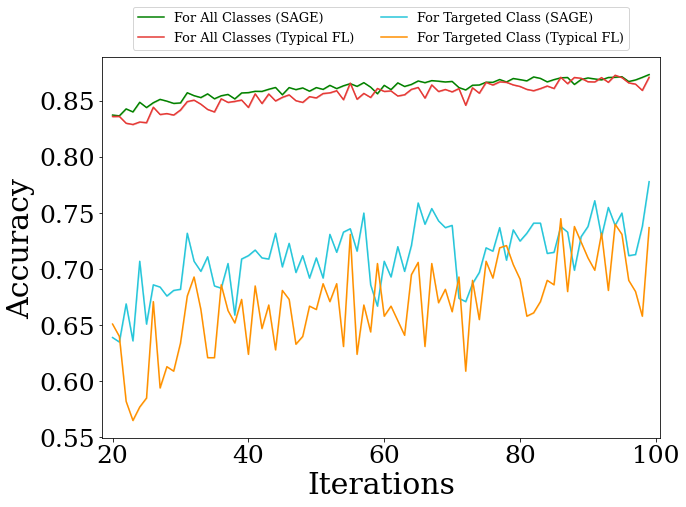

In [41]:
round = [i for i in range(20,100)]

fig, ax = plt.subplots(figsize=(10,7))
ax.set_xlabel("Iterations",fontsize=30)
ax.set_ylabel("Accuracy",fontsize=30)
ax.set_xticks([20,40,60,80,100])
#ax.set_yticks([0.95,0.85,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05])
#ax.set_ylim(0.,1)
ax.tick_params(labelsize=25)

#y_round = [0.90,0.89,0.88,0.87,0.86,0.85,0.84,0.83,0.82,0.81,0.80]
#ax.set_yticks(y_round)

ax.plot(round, mean_round[20:], c = 'green', label='For All Classes (SAGE)')
ax.fill_between(round, max_round[20:], min_round[20:], color = "#C5E1A5", alpha=0.7)

ax.plot(round, origin_mean_round[20:], c = '#e53935', label='For All Classes (Typical FL)')
ax.fill_between(round, origin_max_round[20:], origin_min_round[20:], color = "#ef9a9a", alpha=0.6)

#ax.legend(loc='upper center',bbox_to_anchor =(0.5, 1.15),ncol=4,fontsize=12)

ax.plot(round, label_mean_round[20:], c = '#26C6DA', label='For Targeted Class (SAGE)')
ax.fill_between(round, label_max_round[20:], label_min_round[20:], color = "#B2EBF2", alpha=0.6)

ax.plot(round, label_origin_mean_round[20:], c = '#FF8F00', label='For Targeted Class (Typical FL)')
ax.fill_between(round, label_origin_max_round[20:], label_origin_min_round[20:], color = "#FFE082", alpha=0.4)

ax.legend(loc='upper center',bbox_to_anchor =(0.5, 1.15),ncol=2,fontsize=13)
ax.margins(x=0.02) 